In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.geodesic import Geodesic
land_color = [85/255, 92/255, 105/255]
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=land_color)
plt.rcParams['axes.grid'] = True
import numpy as np
import xarray as xr
import pandas as pd
import gsw, os

In [100]:
df1 = xr.open_dataset('grd_descent_to_profiles_cln2.nc')
df2 = xr.open_dataset('grd_descent_to_parking_cln2.nc')
df2 = df2.where(~df2['GROUNDING_DEPTH'].isnull(),drop=True)

## Groundings map

In [66]:
def make_map(dsl):
    fig=plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
    ax.add_feature(land_feature, edgecolor=None)
    l=0
    for ds in dsl:
        ax.plot(ds['LONGITUDE'],ds['LATITUDE'],'r.', markersize=4, markeredgecolor='None', alpha=1, transform=ccrs.PlateCarree())
        l += len(ds.N_PROF)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER  
    ax.set_title(str(l)+' groundings')

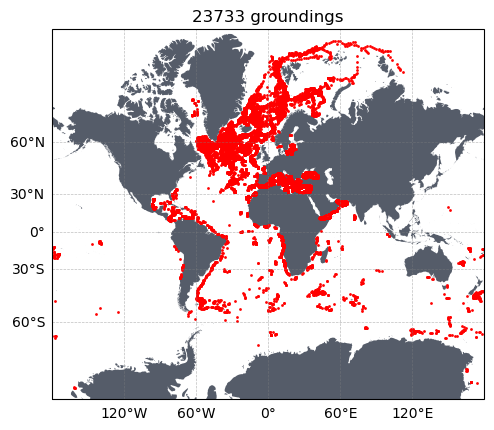

In [101]:
make_map([df1.where((df1['BATHY_WARNING']==0)&(df1['DEPTH_WARNING']==0)&(df1['DATE_WARNING']==0)&(df1['SHALLOW_WARNING']==0),drop=True),
          df2.where((df2['BATHY_WARNING']==0)&(df2['DEPTH_WARNING']==0)&(df2['DATE_WARNING']==0)&(df2['SHALLOW_WARNING']==0),drop=True)])

In [102]:
# DS VERSION WITHOUT WARNING
df1_c = df1.where((df1['BATHY_WARNING']==0)&(df1['DEPTH_WARNING']==0)&(df1['DATE_WARNING']==0)&(df1['SHALLOW_WARNING']==0),drop=True)
df2_c = df2.where((df2['BATHY_WARNING']==0)&(df2['DEPTH_WARNING']==0)&(df2['DATE_WARNING']==0)&(df2['SHALLOW_WARNING']==0),drop=True)

## Distribution of grounding depths

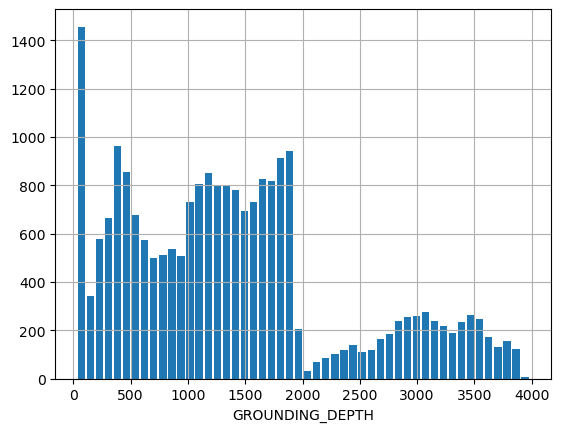

In [103]:
_= df1_c['GROUNDING_DEPTH'].plot.hist(bins=50,rwidth=0.8)

## Distribution of (Grounding depth - bathy)

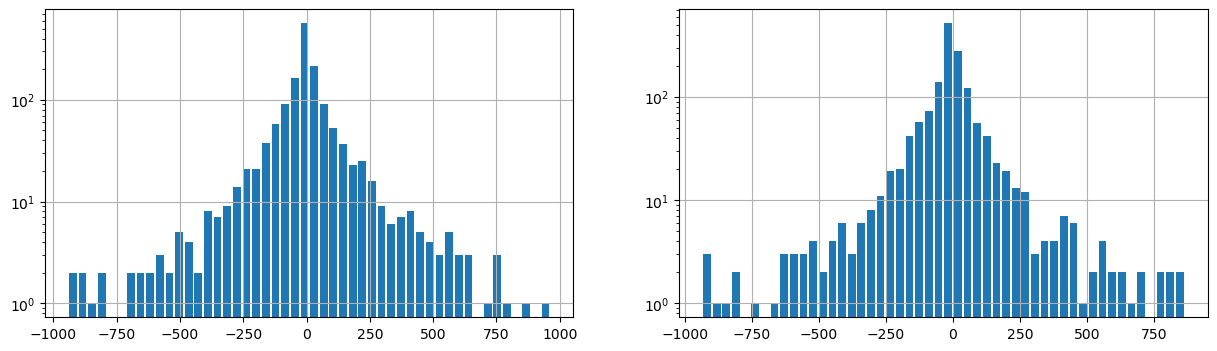

In [104]:
dft = df2_c #.where(df1['PROFILER_TYPE']==838,drop=True)

fig,ax = plt.subplots(1,2,figsize=(15,4))
_=(dft['GROUNDING_DEPTH']-dft['etopo']).plot.hist(bins=50,rwidth=0.8,ax=ax[0])
ax[0].set_yscale('log')
_=(dft['GROUNDING_DEPTH']-dft['gebco']).plot.hist(bins=50,rwidth=0.8,ax=ax[1])
ax[1].set_yscale('log')

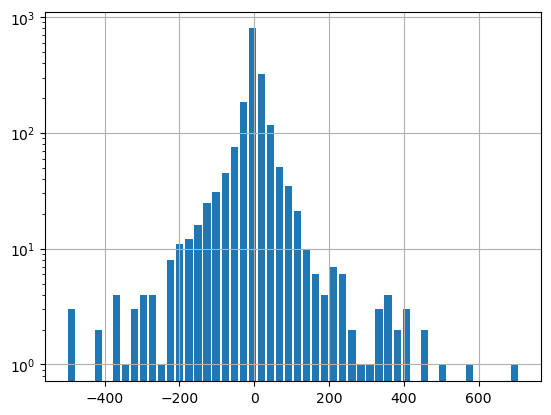

In [105]:
_=(df2['etopo']-df2['gebco']).plot.hist(bins=50,rwidth=0.8)
plt.gca().set_yscale('log')

## Distribution of (Profile depth - Grounding depth)

Text(0.5, 1.0, 'Grounding during descent to parking \n (do not mean anything though)')

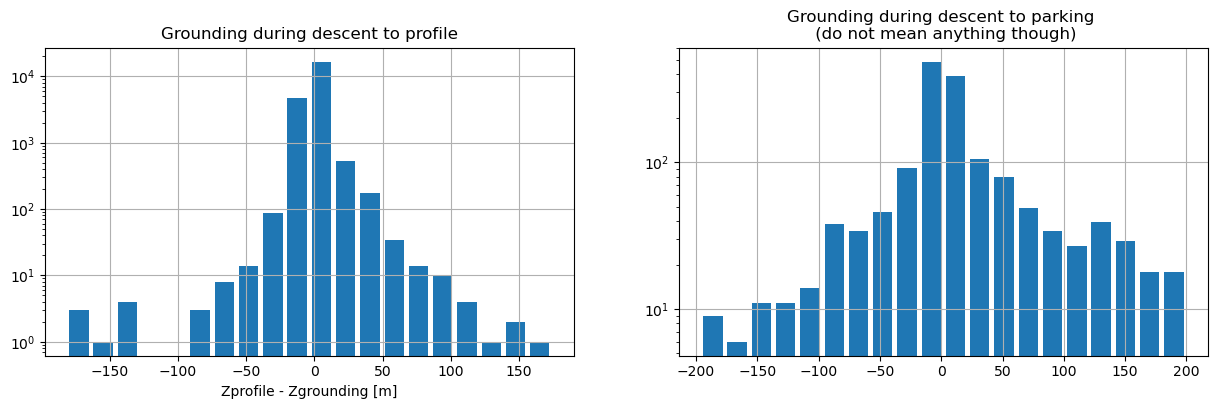

In [106]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
_ = (df1_c['PROFILE_DEPTH']-df1_c['GROUNDING_DEPTH']).plot.hist(bins=20,rwidth=0.8,ax=ax[0]) #,range=[-200,200])
_ = (df2_c['PROFILE_DEPTH']-df2_c['GROUNDING_DEPTH']).plot.hist(bins=20,rwidth=0.8,ax=ax[1]) #,range=[-200,200])

ax[0].set_xlabel('Zprofile - Zgrounding [m]')
ax[0].set_yscale('log')
ax[0].set_title('Grounding during descent to profile')
ax[1].set_yscale('log')
ax[1].set_title('Grounding during descent to parking \n (do not mean anything though)')

Text(0.5, 1.0, 'Grounding during descent to parking')

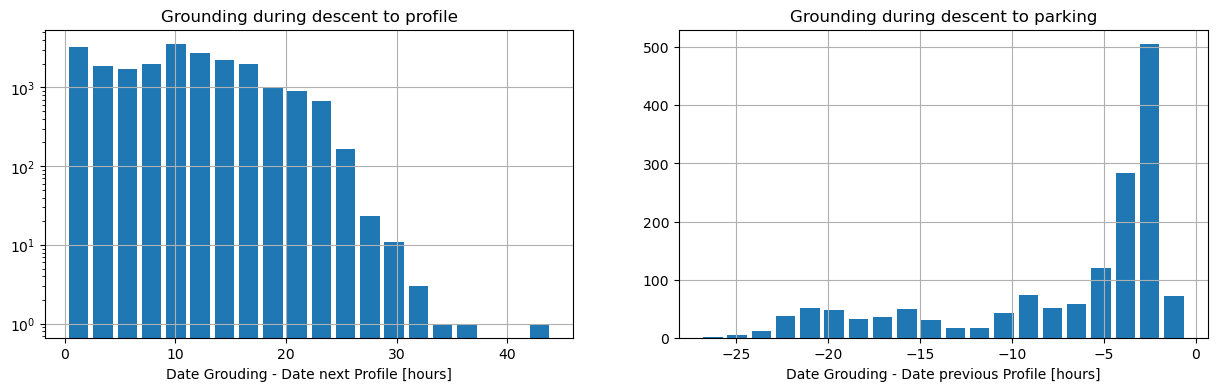

In [107]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
_ = (((df1_c['PROFILE_DATE']-df1_c['GROUNDING_DATE'])).astype(float)/1e9/3600).plot.hist(bins=20,rwidth=0.8,ax=ax[0])
_ = (((df2_c['PROFILE_DATE']-df2_c['GROUNDING_DATE'])).astype(float)/1e9/3600).plot.hist(bins=20,rwidth=0.8,ax=ax[1])
ax[0].set_xlabel('Date Grouding - Date next Profile [hours]')
ax[0].set_yscale('log')
ax[0].set_title('Grounding during descent to profile')
ax[1].set_xlabel('Date Grouding - Date previous Profile [hours]')
ax[1].set_title('Grounding during descent to parking')

Text(0, 0.5, 'PROFILE DATE - GROUNDING DATE (hours)')

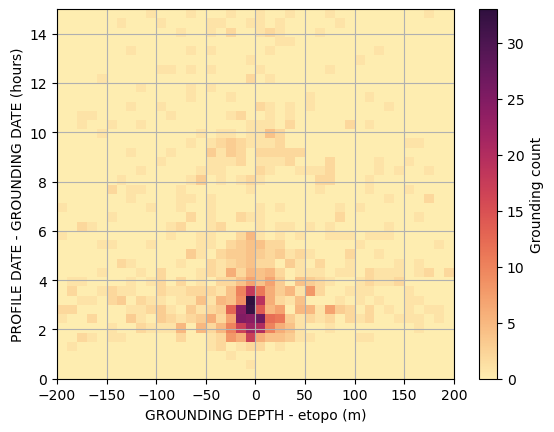

In [112]:
_=plt.hist2d((df2_c['GROUNDING_DEPTH']-df2_c['etopo']),(((df2_c['GROUNDING_DATE']-df2_c['PROFILE_DATE'])).astype(float)/1e9/3600),
            bins=[40,40],norm='linear',cmap=cmocean.cm.matter, range=[[-200,200],[0,15]])
plt.colorbar(label='Grounding count')
plt.xlabel('GROUNDING DEPTH - etopo (m)')
plt.ylabel('PROFILE DATE - GROUNDING DATE (hours)')

Text(0, 0.5, 'PROFILE DATE - GROUNDING DATE (hours)')

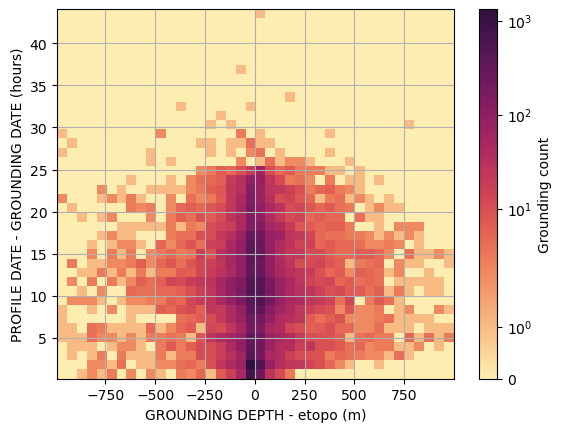

In [46]:
_=plt.hist2d((df1_c['GROUNDING_DEPTH']-df1_c['etopo']),(((df1_c['PROFILE_DATE']-df1_c['GROUNDING_DATE'])).astype(float)/1e9/3600),
            bins=[40,40],norm='symlog',cmap=cmocean.cm.matter)
plt.colorbar(label='Grounding count')
plt.xlabel('GROUNDING DEPTH - etopo (m)')
plt.ylabel('PROFILE DATE - GROUNDING DATE (hours)')

Text(0, 0.5, 'PROFILE DATE - GROUNDING DATE (hours)')

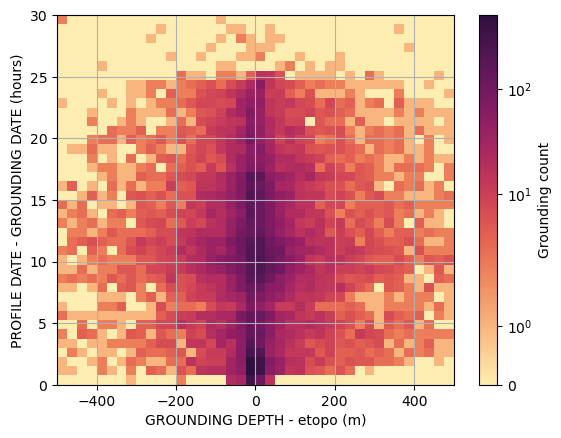

In [55]:
_=plt.hist2d((df1_c['GROUNDING_DEPTH']-df1_c['etopo']),(((df1_c['PROFILE_DATE']-df1_c['GROUNDING_DATE'])).astype(float)/1e9/3600),
            bins=[40,40],norm='symlog',cmap=cmocean.cm.matter, range=[[-500,500],[0,30]],vmax=500)
plt.colorbar(label='Grounding count')
plt.xlabel('GROUNDING DEPTH - etopo (m)')
plt.ylabel('PROFILE DATE - GROUNDING DATE (hours)')

## Deep floats

In [59]:
deep = df1_c.where((df1_c['PROFILER_TYPE']==838),drop=True)

In [64]:
print(len(deep.N_PROF),'profiles')

4202 profiles


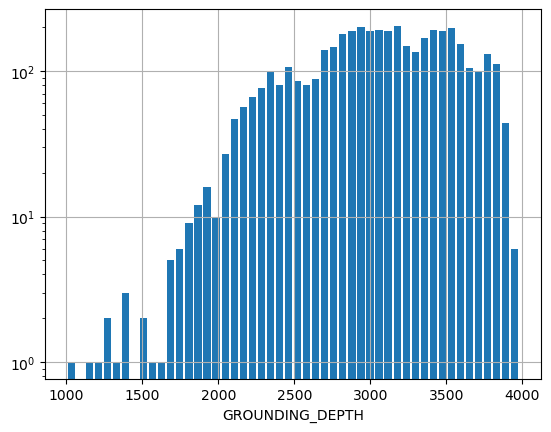

In [63]:
_=deep['GROUNDING_DEPTH'].plot.hist(bins=50,rwidth=0.8)
plt.gca().set_yscale('log')

Text(0, 0.5, 'PROFILE DATE - GROUNDING DATE (hours)')

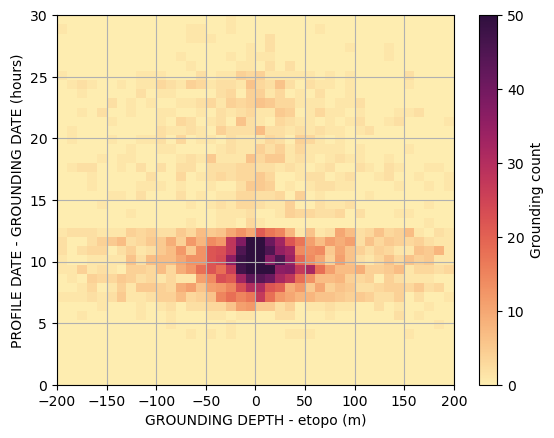

In [73]:
_=plt.hist2d((deep['GROUNDING_DEPTH']-deep['gebco']),(((deep['PROFILE_DATE']-deep['GROUNDING_DATE'])).astype(float)/1e9/3600),
            bins=[40,40],norm='linear',cmap=cmocean.cm.matter, range=[[-200,200],[0,30]],vmax=50)
plt.colorbar(label='Grounding count')
plt.xlabel('GROUNDING DEPTH - etopo (m)')
plt.ylabel('PROFILE DATE - GROUNDING DATE (hours)')

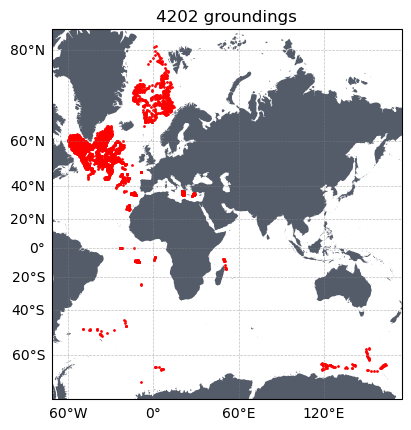

In [67]:
make_map([deep])